In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [35]:
claims = pd.read_csv("D:/Purdue/Study material/Python/project/data/insurance_claims.csv")

In [36]:
claims.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [37]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [38]:
claims.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [39]:
claims.replace('?', np.nan, inplace = True)

In [40]:
claims.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [41]:
null_cols = claims.isnull().sum()
null_cols = list(null_cols[null_cols>0].index)
for i in range(len(null_cols)):
    claims[null_cols[i]].fillna(claims[null_cols[i]].mode()[0], inplace=True)

In [42]:
claims.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [43]:
num_cols = list(claims.select_dtypes(include = np.number).columns)
cat_cols = [i for i  in claims.columns if i not in num_cols]
cat_cols.remove("policy_bind_date")
cat_cols.remove("incident_location")
cat_cols.remove("incident_date")

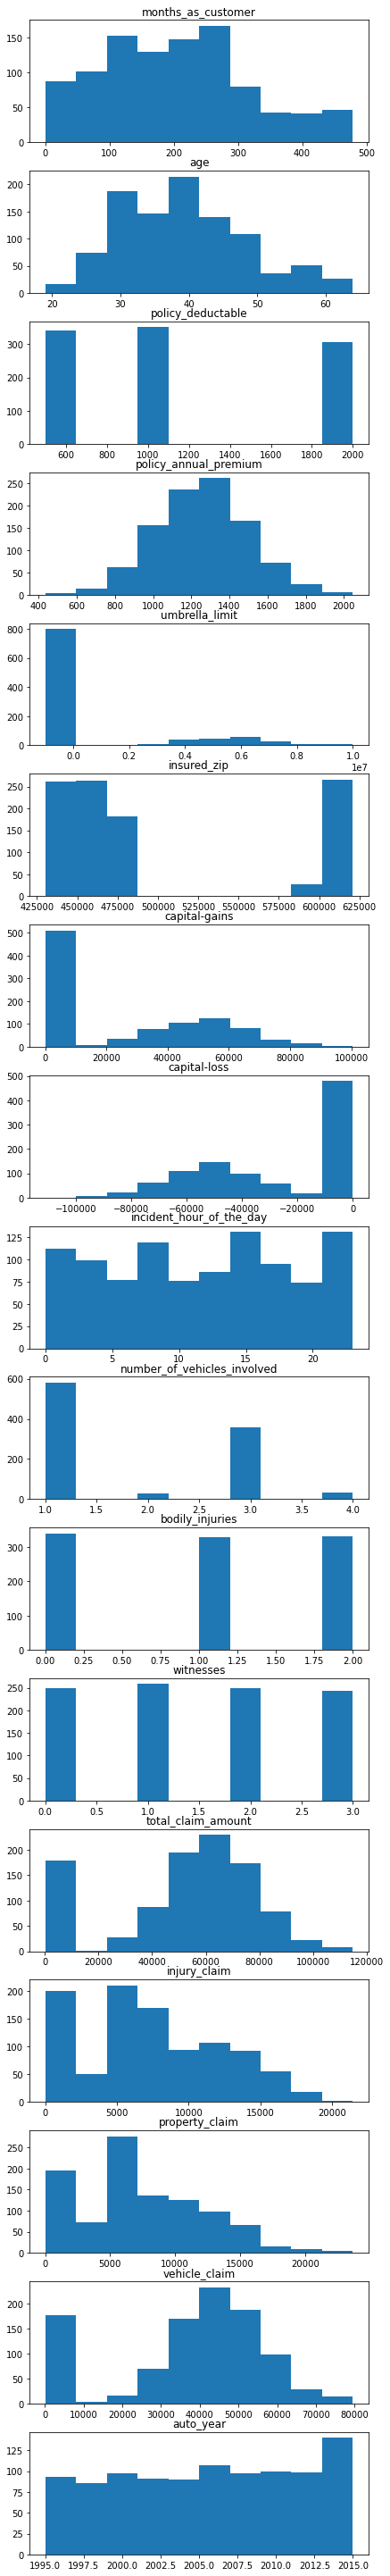

In [130]:
ncols = 1
nrows = len(num_cols)
fig,ax = plt.subplots(nrows, ncols, figsize=(6,40))
fig.tight_layout()
for i in range(len(num_cols)):
    ax[i].hist(claims[num_cols[i]])
    ax[i].set_title(num_cols[i])

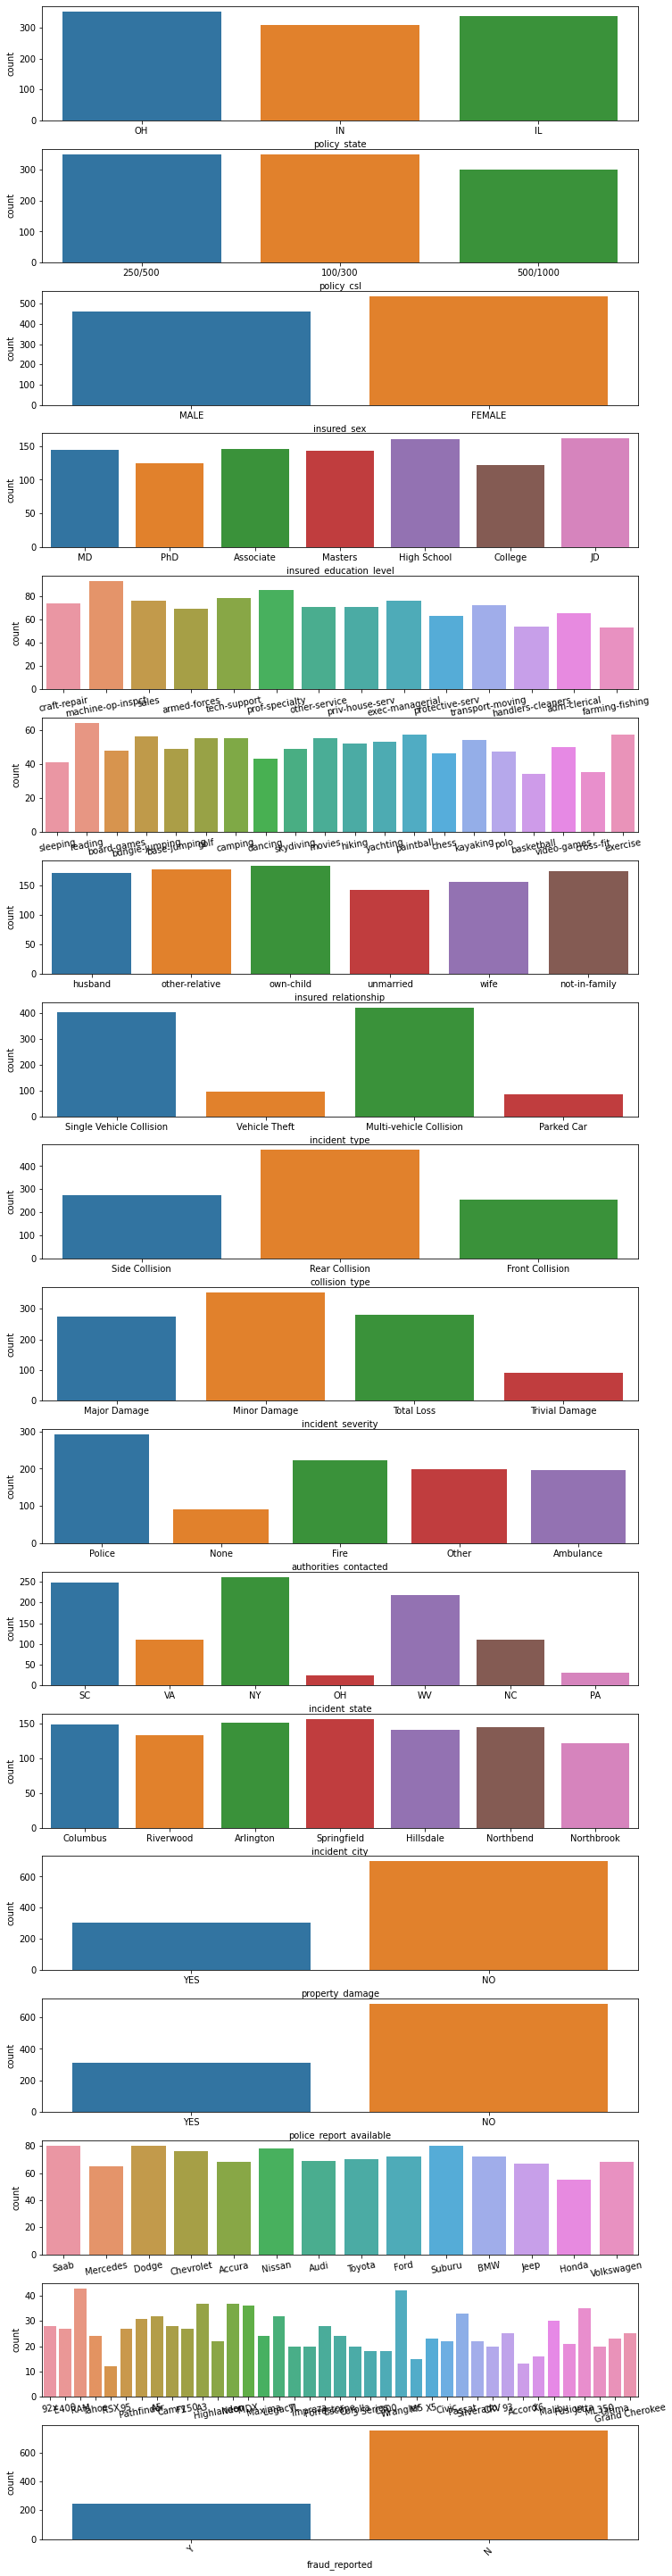

In [123]:
ncols = 1
nrows = len(cat_cols)
fig,ax = plt.subplots(nrows, ncols, figsize=(10,40))
fig.tight_layout()
for i in range(len(cat_cols)):
    sns.countplot(x = cat_cols[i], data =claims, ax=ax[i])
    if claims[cat_cols[i]].nunique()>8:
        ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 10)

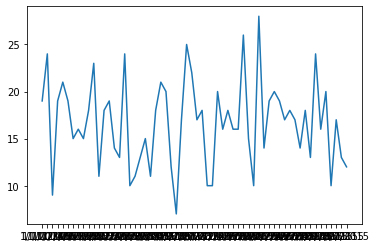

In [227]:
timeseries = pd.DataFrame(claims['incident_date'].value_counts())
timeseries.sort_index(inplace=True)
fig,ax = plt.subplots()
ax.plot(timeseries.index,timeseries["incident_date"])

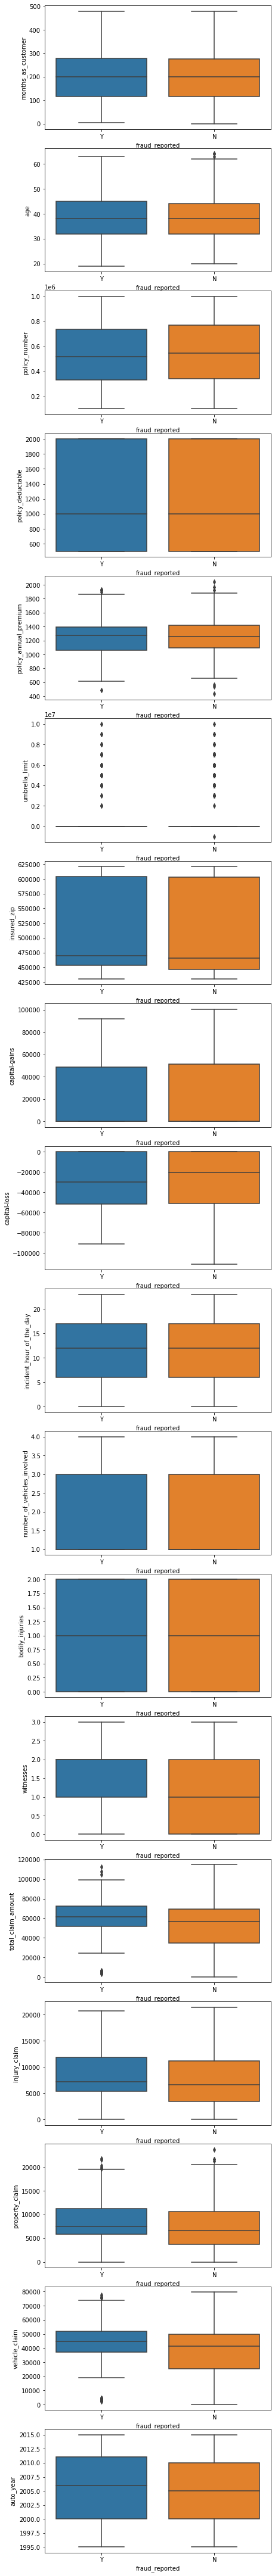

In [127]:
ncols = 1
nrows = len(num_cols)
fig,ax = plt.subplots(nrows, ncols, figsize=(6,60))
fig.tight_layout()
for i in range(len(num_cols)):
    sns.boxplot(y=num_cols[i], x="fraud_reported",data=claims, ax=ax[i])

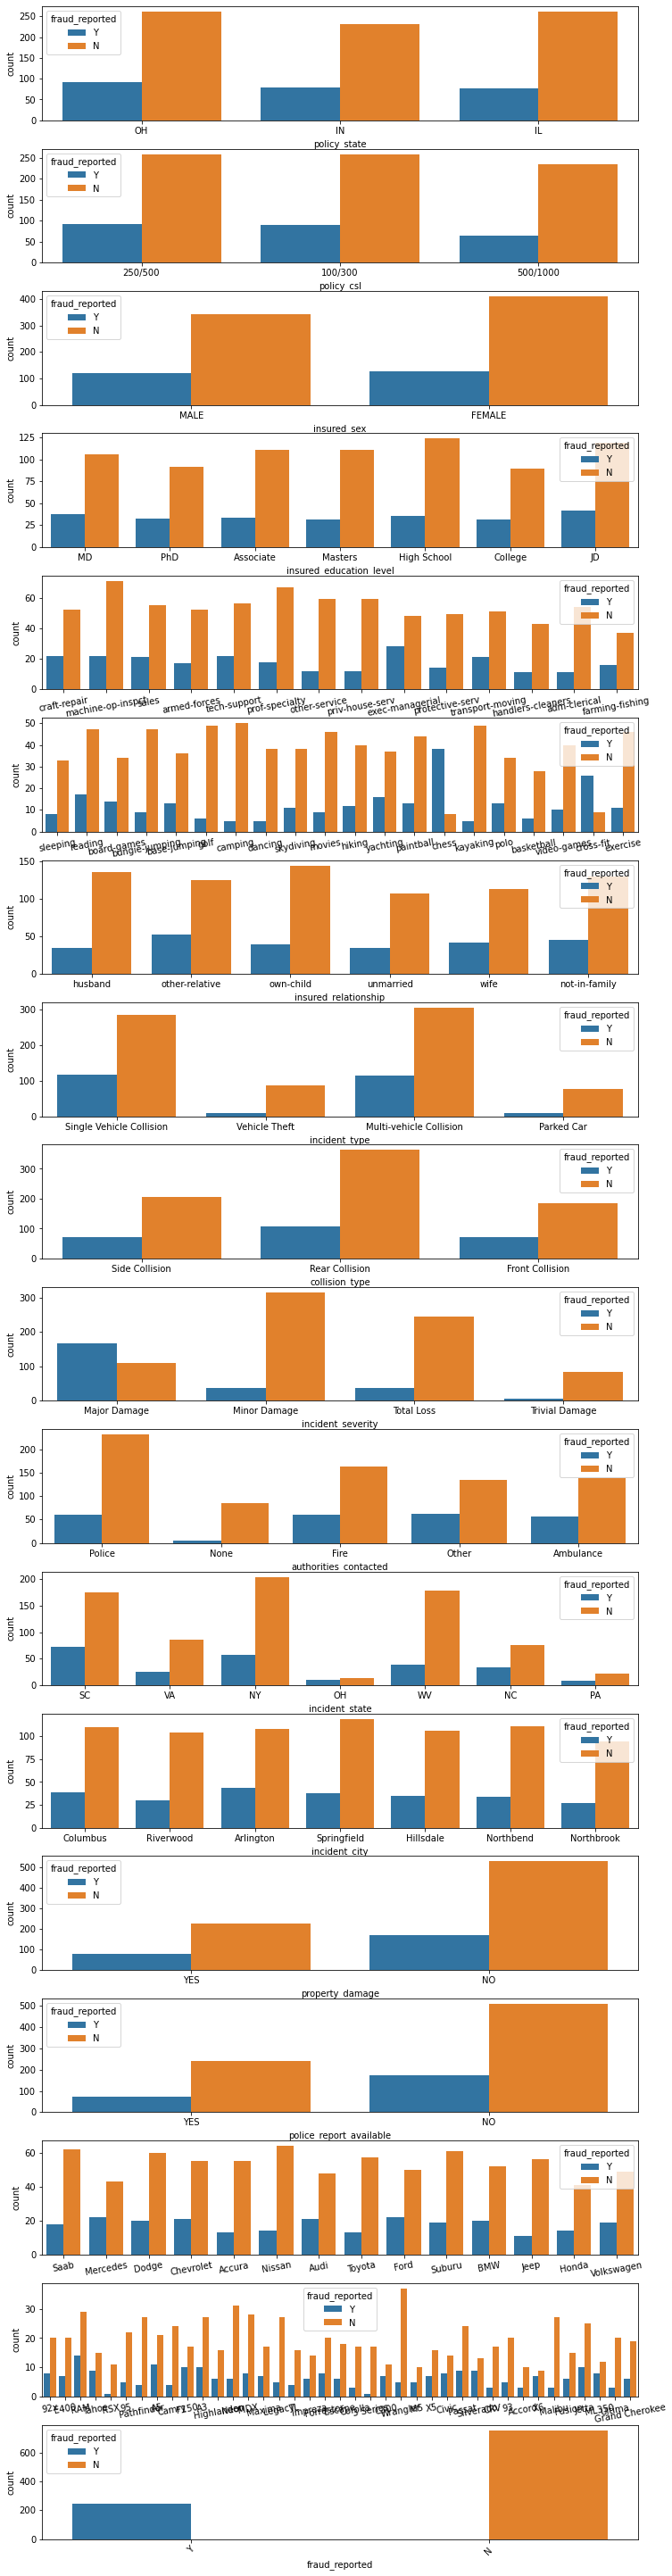

In [228]:
ncols = 1
nrows = len(cat_cols)
fig,ax = plt.subplots(nrows, ncols, figsize=(10,40))
fig.tight_layout()
plt.xticks(rotation=45)
for i in range(len(cat_cols)):
    sns.countplot(x = cat_cols[i], data =claims, hue="fraud_reported", ax=ax[i])
    if claims[cat_cols[i]].nunique()>8:
        ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 10)

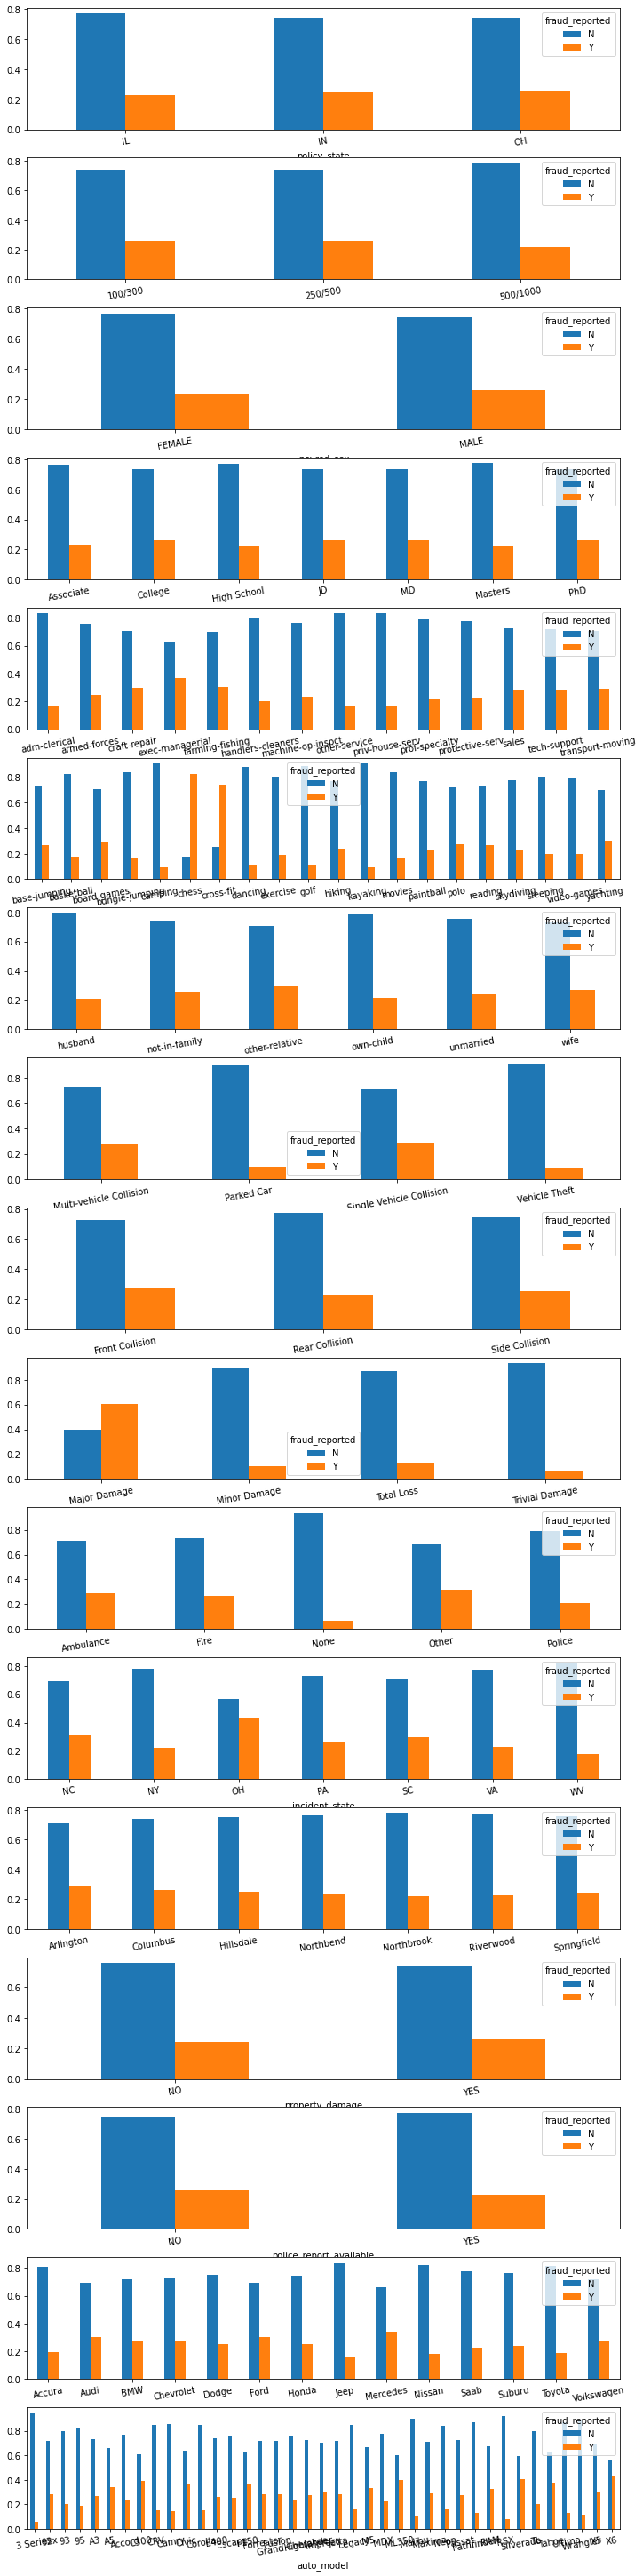

In [39]:
ncols = 1
nrows = len(cat_cols)
fig,ax = plt.subplots(nrows-1, ncols, figsize=(10,40))
fig.tight_layout()
plt.xticks(rotation=45)
for i in range(len(cat_cols)):
    if cat_cols[i] =="fraud_reported":
        continue
    claims.groupby(cat_cols[i])['fraud_reported'].value_counts(normalize=True).unstack('fraud_reported').plot.bar(stacked=False,ax=ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 10)   

Text(0.5, 0, 'Percentage of frauds')

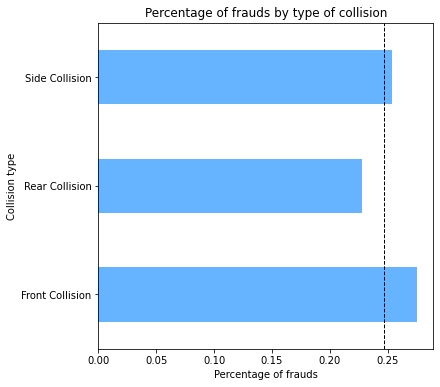

In [76]:
fig,ax = plt.subplots(figsize=(6,6))
claims.groupby('collision_type')['fraud_reported'].value_counts(normalize=True).unstack('fraud_reported')['Y'].plot.barh(stacked=False,color=['#66b3ff'],ax=ax)
ax.axvline(x=0.247,linewidth=1, color='k', linestyle= '--')
ax.set_title("Percentage of frauds by type of collision")
ax.set_ylabel("Collision type")
ax.set_xlabel("Percentage of frauds")

In [42]:
from scipy import stats

In [75]:
ttest = pd.DataFrame({'col_name':[],'t_value':[],'p_value':[],'H0':[]})
for i in range(len(num_cols)):
    fraud_yes = claims.loc[claims['fraud_reported']=='Y',num_cols[i]]
    fraud_no = claims.loc[claims['fraud_reported']=='N',num_cols[i]]
    results = stats.ttest_ind(fraud_yes, fraud_no, equal_var=False)    
    ttest.loc[i,'col_name'] = num_cols[i]
    ttest.loc[i,'t_value'] = results[0]
    ttest.loc[i,'p_value'] = results[1]
    ttest.loc[i,'H0'] = np.where(results[1]<0.005,False,True)
ttest

,col_name,t_value,p_value,H0
0,months_as_customer,0.631767,5.278993e-01,True
1,age,0.369827,7.117098e-01,True
2,policy_number,-0.932356,3.516877e-01,True
3,policy_deductable,0.460021,6.457465e-01,True
4,policy_annual_premium,-0.446356,6.555803e-01,True
5,umbrella_limit,1.751036,8.074098e-02,True
6,insured_zip,0.619116,5.361698e-01,True
7,capital-gains,-0.607477,5.438618e-01,True
8,capital-loss,-0.475394,6.347485e-01,True
9,incident_hour_of_the_day,0.137225,8.909182e-01,True


0.34530716969204184

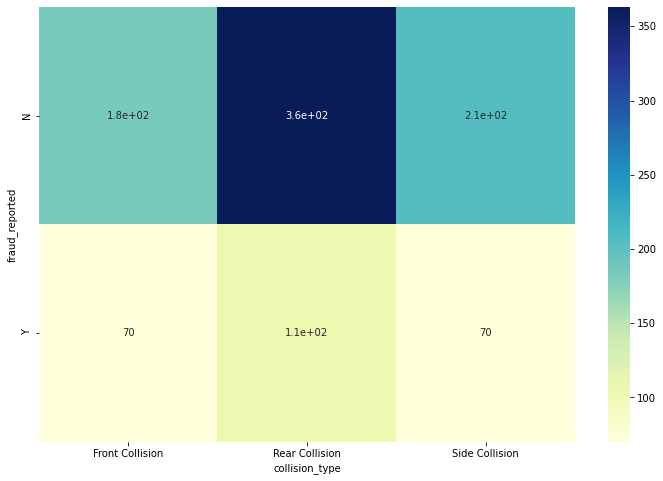

In [79]:
contigency= pd.crosstab(claims['fraud_reported'], claims['collision_type'])
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")
c, p, dof, expected = chi2_contingency(contigency)
p

In [44]:
claims.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [88]:
claims2 = claims.copy()
drop_cols = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

claims2.drop(drop_cols, inplace = True, axis = 1)
claims2.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

In [89]:
claims2 = pd.get_dummies(claims2, drop_first=False)
drop_cols = ['policy_csl_100/300','insured_sex_FEMALE','insured_education_level_Associate','insured_occupation_adm-clerical',
    'incident_type_Multi-vehicle Collision','collision_type_Front Collision','incident_severity_Trivial Damage',
    'authorities_contacted_None','property_damage_NO','police_report_available_NO','fraud_reported_N','insured_relationship_husband']
claims2.drop(drop_cols,axis=1, inplace=True)
claims2.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES,fraud_reported_Y
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,1,0,0,0,0,0,1,1,1,1
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,1,0,0,0,0,1,0,0,1
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0,1,0,0,0,0,1,0,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,1,0,0,0,0,0,1,0,0,1
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,0,1,0,0,0,0,0,0,0,0


In [90]:
X = claims2.drop('fraud_reported_Y', axis=1)
y = claims2['fraud_reported_Y']

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.metrics import classification_report

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y )
X_train.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
235,428,54,2000,1506.21,0,0,-24400,16,3,1,...,1,0,1,0,0,1,0,0,0,0
497,0,32,1000,1377.04,0,61400,-41100,6,4,1,...,0,0,1,0,1,0,0,0,0,0
169,47,37,2000,1241.97,0,75400,0,18,1,1,...,0,0,1,0,0,0,0,0,0,0
511,283,48,1000,1474.66,0,0,-46200,9,1,2,...,0,0,0,0,0,0,0,1,0,0
208,343,48,500,1451.54,3000000,0,0,13,4,2,...,1,0,0,1,0,0,0,1,0,0


In [93]:
scalar = MinMaxScaler()
X_train_scaled = pd.DataFrame(scalar.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scalar.transform(X_test), columns=X_test.columns)
X_test_scaled.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,0.974948,0.863636,1.000000,0.337040,0.090909,0.817910,1.000000,0.086957,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.411273,0.477273,0.333333,0.552234,0.090909,0.000000,0.419442,0.260870,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.713987,0.659091,0.000000,0.798892,0.090909,0.627861,0.875788,0.130435,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.511482,0.454545,0.333333,0.574951,0.090909,0.391045,1.000000,0.521739,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.066806,0.136364,1.000000,0.512303,0.636364,0.000000,0.281728,0.695652,0.0,0.5,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [94]:
X_train2  = X_train_scaled.copy()
X_train2["fraud_reported_Y"] = y_train.tolist()
X_train2_majority = X_train2.loc[X_train2.fraud_reported_Y==0]
X_train2_minority = X_train2.loc[X_train2.fraud_reported_Y==1]
X_train2_majority_downsampled = resample(X_train2_majority, replace= False, n_samples= len(X_train2_minority), random_state=42)
X_train2_downsampled = pd.concat([X_train2_majority_downsampled,X_train2_minority])
y_train_downsampled = X_train2_downsampled.fraud_reported_Y
X_train_downsampled = X_train2_downsampled.drop("fraud_reported_Y", axis=1)

In [95]:
from sklearn.ensemble import RandomForestClassifier 


In [96]:
rf = RandomForestClassifier(random_state=52)
rf.fit(X_train_downsampled, y_train_downsampled)
y_pred2 = rf.predict(X_test_scaled)
print(rf.score(X_test_scaled, y_test))
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

0.8066666666666666
[[190  36]
 [ 22  52]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       226
           1       0.59      0.70      0.64        74

    accuracy                           0.81       300
   macro avg       0.74      0.77      0.75       300
weighted avg       0.82      0.81      0.81       300



In [29]:
import statsmodels.api as sm

In [98]:
logit_model=sm.Logit( y_train_downsampled,X_train_downsampled)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.475722
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:       fraud_reported_Y   No. Observations:                  346
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                           55
Date:                Fri, 01 Oct 2021   Pseudo R-squ.:                  0.3137
Time:                        13:33:10   Log-Likelihood:                -164.60
converged:                       True   LL-Null:                       -239.83
Covariance Type:            nonrobust   LLR p-value:                 8.269e-11
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
months_as_customer                         0.3703   

[Text(0, 0, 'incident_severity_Major Damage'),
 Text(1, 0, 'vehicle_claim'),
 Text(2, 0, 'total_claim_amount'),
 Text(3, 0, 'property_claim'),
 Text(4, 0, 'policy_annual_premium'),
 Text(5, 0, 'months_as_customer'),
 Text(6, 0, 'injury_claim'),
 Text(7, 0, 'age'),
 Text(8, 0, 'incident_hour_of_the_day'),
 Text(9, 0, 'incident_severity_Minor Damage'),
 Text(10, 0, 'capital-loss'),
 Text(11, 0, 'incident_severity_Total Loss'),
 Text(12, 0, 'capital-gains'),
 Text(13, 0, 'witnesses'),
 Text(14, 0, 'umbrella_limit'),
 Text(15, 0, 'policy_deductable'),
 Text(16, 0, 'bodily_injuries'),
 Text(17, 0, 'policy_csl_250/500'),
 Text(18, 0, 'authorities_contacted_Ambulance'),
 Text(19, 0, 'number_of_vehicles_involved')]

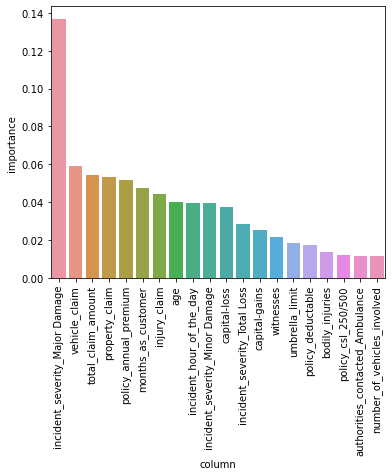

In [97]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({"column":X_train.columns,"importance":importances})
feature_importances_top10 = feature_importances.sort_values("importance", ascending=False)
feature_importances_top10 = feature_importances_top10.nlargest(20, "importance")
fix,ax = plt.subplots(figsize=(6,5))
sns.barplot(x="column",y="importance", data=feature_importances_top10, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)